In [22]:
import tensorflow as tf
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [23]:
def plotData(X, y):
    p1 = plt.plot(X[np.where(y==1),0], X[np.where(y==1),1], marker='+', markersize=9, color='blue')[0]
    p2 = plt.plot(X[np.where(y==0),0], X[np.where(y==0),1], marker='o', markersize=7, color='red')[0]
    return plt, p1, p2

In [24]:
def plot_boundary(X, y,degree,pred):
    plt, p1, p2 = plotData(X, y)
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1    
    xs, ys = np.meshgrid(np.linspace(x_min, x_max, 200),np.linspace(y_min, y_max, 200))
    #xys = np.column_stack([xs.ravel(), ys.ravel()])
    xys = mapFeature(xs.ravel(),ys.ravel(),degree)
    print("XYS shape ",xys.shape)
    zs = pred(xys).reshape(xs.shape)
    plt.contourf(xs, ys, zs)
    plt.show()

In [25]:
def mapFeature(X1, X2, degree):
    out = np.ones(( X1.shape[0], sum(range(degree + 2)) )) # could also use ((degree+1) * (degree+2)) / 2 instead of sum
    curr_column = 1
    for i in range(1, degree + 1):
        for j in range(i+1):
            out[:,curr_column] = np.power(X1,i-j) * np.power(X2,j)
            curr_column += 1
    out=np.delete(out,0,1)        
    return out

In [26]:
def tf_create(n_features, n_labels, lambda_):   
    X_data = tf.placeholder(tf.float64, [None, n_features])
    y_data = tf.placeholder(tf.float64, [None, n_labels])
    W      = tf.Variable(tf.zeros([n_features, n_labels], dtype=tf.float64))
    b      = tf.Variable(tf.zeros([n_labels], dtype=tf.float64))
    hyp = tf.sigmoid(tf.add(tf.matmul(X_data,W),b))
    loss = tf.reduce_mean(-y_data*tf.log(hyp)-(1-y_data)*tf.log(1-hyp))+lambda_ * tf.nn.l2_loss(W)
    train = tf.train.AdamOptimizer().minimize(loss)
    predict = hyp>0.5
    def train_(sess, X, y, iterations):
        for i in range(iterations):
            sess.run(train, feed_dict={X_data: X, y_data: y})
    def predict_(sess, X):
        return sess.run(predict, feed_dict={X_data: X})
    return train_, predict_

accuracy: 0.89
precision: 0.886717108029
recall: 0.883333333333
XYS shape  (40000, 2)


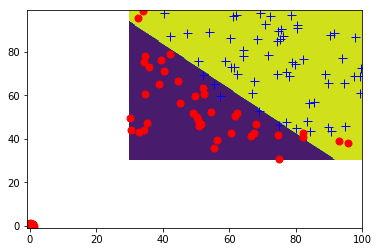

In [27]:
data = np.loadtxt('data1.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
yy =data[:,2]
#plotData(X,y)
y=y.reshape(-1,1)
degree=1
with tf.Session() as sess:    
    train, predict = tf_create(X.shape[1], 1, 0.0)
    sess.run(tf.global_variables_initializer())
    train(sess, X, y, 30000)
    predictions = predict(sess, X)
    print('accuracy:', accuracy_score(y, predictions))
    print('precision:', precision_score(y, predictions, average='macro'))
    print('recall:', recall_score(y, predictions, average='macro'))
    plot_boundary(X, yy,degree,lambda xx: predict(sess, xx))

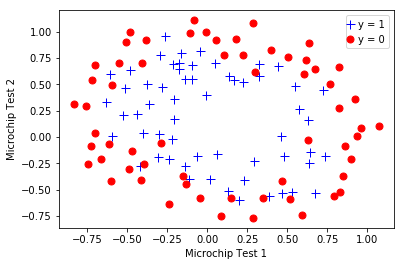

accuracy: 0.830508474576
precision: 0.830747126437
recall: 0.830747126437
XYS shape  (40000, 27)


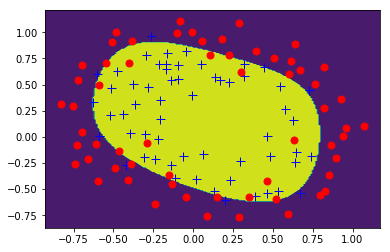

In [28]:
data = np.loadtxt('data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
yy= data[:,2]
degree=6
plt, p1, p2 = plotData(X, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend((p1, p2), ('y = 1', 'y = 0'), numpoints=1, handlelength=0)
plt.show(block=False)
X = mapFeature(X[:,0], X[:,1],degree)
y=y.reshape(-1,1)
with tf.Session() as sess:    
    train, predict = tf_create(X.shape[1], 1, 0.0)
    sess.run(tf.global_variables_initializer())
    train(sess, X, y, 5000)
    predictions = predict(sess, X)
    print('accuracy:', accuracy_score(y, predictions))
    print('precision:', precision_score(y, predictions, average='macro'))
    print('recall:', recall_score(y, predictions, average='macro'))
    plot_boundary(X, yy,degree,lambda xx: predict(sess, xx))